# WGI

In [1]:
import pandas
import numpy
import matplotlib.pyplot as plt
import seaborn
seaborn.set_style("white")
seaborn.set(font_scale = 2)

from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

%matplotlib inline

In [2]:
wgi = pandas.read_csv("https://fxjollois.github.io/donnees/WGI/wgi2019.csv")
wgi.head(10)

,Country,Code,Voice and Accountability,Political Stability and Absence of Violence/Terrorism,Government Effectiveness,Regulatory Quality,Rule of Law
0,Aruba,ABW,1.294189,1.357372,1.029933,0.857360,1.263128
1,Andorra,ADO,1.139154,1.615139,1.908749,1.228176,1.579939
2,Afghanistan,AFG,-0.988032,-2.649407,-1.463875,-1.120555,-1.713527
3,Angola,AGO,-0.777283,-0.311101,-1.117144,-0.893871,-1.054343
4,Anguilla,AIA,NaN,1.367357,0.815824,0.846231,0.355737
5,Albania,ALB,0.151805,0.118570,-0.061331,0.274380,-0.411179
6,Netherlands Antilles (former),ANT,NaN,NaN,NaN,NaN,NaN
7,United Arab Emirates,ARE,-1.122036,0.703494,1.377221,0.979325,0.840219
8,Argentina,ARG,0.600435,-0.119978,-0.086486,-0.492753,-0.430726
9,Armenia,ARM,0.050043,-0.506411,-0.066817,0.249515,-0.131276


## Description des données

In [3]:
wgi.describe().round(2)

,Voice and Accountability,Political Stability and Absence of Violence/Terrorism,Government Effectiveness,Regulatory Quality,Rule of Law
count,204.00,211.00,209.00,209.00,209.00
mean,0.00,0.00,-0.00,0.00,0.00
std,1.00,1.00,1.00,1.00,1.00
min,-2.19,-2.77,-2.45,-2.40,-2.35
25%,-0.79,-0.55,-0.68,-0.69,-0.72
50%,0.09,0.07,-0.07,-0.11,-0.12
75%,0.90,0.84,0.71,0.85,0.69
max,1.69,1.90,2.22,2.16,2.02


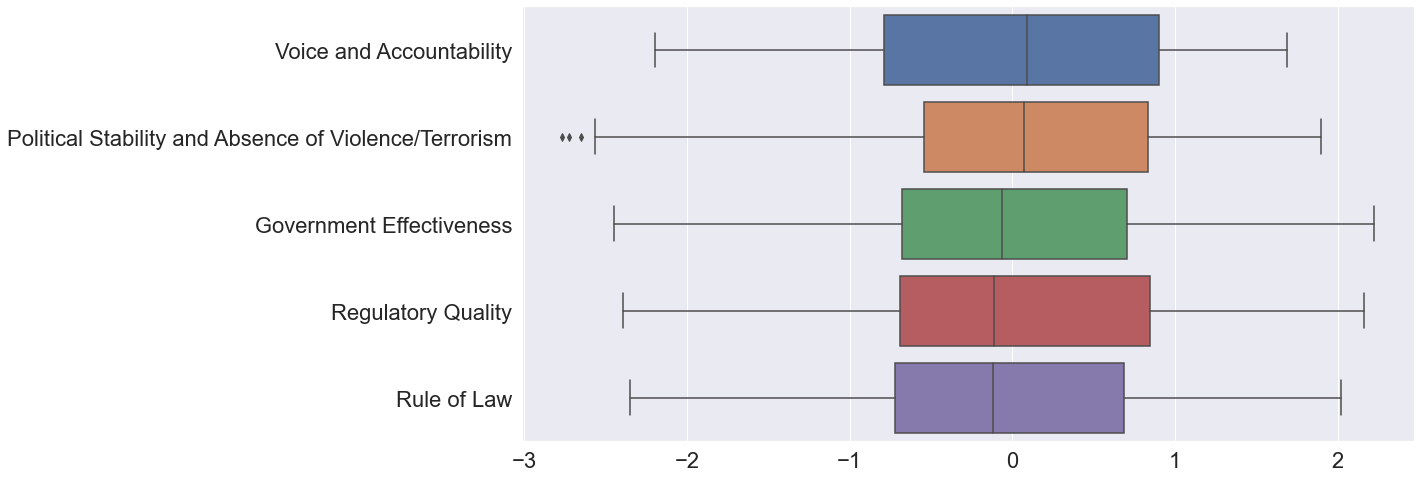

In [4]:
plt.figure(figsize = (16, 8))
seaborn.boxplot(data = wgi, orient = "h")
plt.show()

## ACP sur les données

In [5]:
wgi.isna().sum()

Country                                                   0
Code                                                      0
Voice and Accountability                                 10
Political Stability and Absence of Violence/Terrorism     3
Government Effectiveness                                  5
Regulatory Quality                                        5
Rule of Law                                               5
dtype: int64

In [6]:
wgi_complet = wgi[~wgi.isna().any(axis = 1)].reset_index()
wgi_complet.head(10)

,index,Country,Code,Voice and Accountability,Political Stability and Absence of Violence/Terrorism,Government Effectiveness,Regulatory Quality,Rule of Law
0,0,Aruba,ABW,1.294189,1.357372,1.029933,0.857360,1.263128
1,1,Andorra,ADO,1.139154,1.615139,1.908749,1.228176,1.579939
2,2,Afghanistan,AFG,-0.988032,-2.649407,-1.463875,-1.120555,-1.713527
3,3,Angola,AGO,-0.777283,-0.311101,-1.117144,-0.893871,-1.054343
4,5,Albania,ALB,0.151805,0.118570,-0.061331,0.274380,-0.411179
5,7,United Arab Emirates,ARE,-1.122036,0.703494,1.377221,0.979325,0.840219
6,8,Argentina,ARG,0.600435,-0.119978,-0.086486,-0.492753,-0.430726
7,9,Armenia,ARM,0.050043,-0.506411,-0.066817,0.249515,-0.131276
8,11,Antigua and Barbuda,ATG,0.760444,0.959709,-0.003870,0.485375,0.405205
9,12,Australia,AUS,1.315125,1.086503,1.571896,1.873539,1.734145


In [7]:
wgi_num = wgi_complet[wgi.columns[2:]]
wgi_num

,Voice and Accountability,Political Stability and Absence of Violence/Terrorism,Government Effectiveness,Regulatory Quality,Rule of Law
0,1.294189,1.357372,1.029933,0.857360,1.263128
1,1.139154,1.615139,1.908749,1.228176,1.579939
2,-0.988032,-2.649407,-1.463875,-1.120555,-1.713527
3,-0.777283,-0.311101,-1.117144,-0.893871,-1.054343
4,0.151805,0.118570,-0.061331,0.274380,-0.411179
...,...,...,...,...,...
197,0.026626,-0.091665,0.019079,0.113867,-0.119070
198,0.670388,-0.217931,0.367380,0.156172,-0.076408
199,-1.365966,-1.808007,-1.627429,-1.509667,-1.786088
200,-0.286199,-0.102216,-0.675215,-0.554269,-0.462069


In [8]:
pca = PCA(n_components = 5)
pca.fit(wgi_num)

PCA(n_components=5)

In [9]:
eig = pandas.DataFrame(
    {
        "Dimension" : ["Dim" + str(x + 1) for x in range(5)], 
        "Valeur propre" : pca.explained_variance_,
        "% variance expliquée" : numpy.round(pca.explained_variance_ratio_ * 100),
        "% cum. var. expliquée" : numpy.round(numpy.cumsum(pca.explained_variance_ratio_) * 100)
    },
    columns = ["Dimension", "Valeur propre", "% variance expliquée", "% cum. var. expliquée"]
)
eig

,Dimension,Valeur propre,% variance expliquée,% cum. var. expliquée
0,Dim1,4.171532,83.0,83.0
1,Dim2,0.410735,8.0,92.0
2,Dim3,0.306773,6.0,98.0
3,Dim4,0.064855,1.0,99.0
4,Dim5,0.047852,1.0,100.0


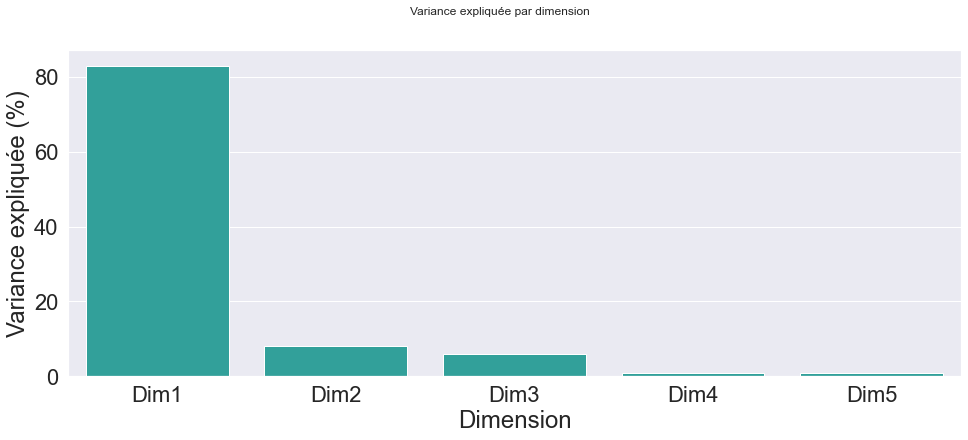

In [10]:
plt.figure(figsize=(16, 6))
g_eig = seaborn.barplot(x = "Dimension", 
                        y = "% variance expliquée",
                        palette = ["lightseagreen"],
                        data = eig)
g_eig.set(ylabel = "Variance expliquée (%)")
g_eig.figure.suptitle("Variance expliquée par dimension")

plt.show()

In [11]:
wgi_proj = pandas.DataFrame(pca.transform(wgi_num)).rename(columns = {i: "Dim"+str(i+1) for i in range(5)})
wgi_proj

,Dim1,Dim2,Dim3,Dim4,Dim5
0,-2.638757,0.502308,0.046046,-0.157724,-0.029271
1,-3.410131,0.039344,0.465981,-0.131732,-0.367349
2,3.453682,-0.829503,-1.096399,0.081067,-0.057197
3,1.824034,0.440028,0.243331,0.207503,0.142553
4,-0.077668,0.116001,-0.087768,0.510156,0.007130
...,...,...,...,...,...
197,-0.041040,-0.081600,-0.067417,0.141064,-0.012754
198,-0.460617,-0.029647,-0.574125,0.117441,-0.358067
199,3.555899,-0.213621,-0.294014,0.079304,-0.032185
200,0.888472,0.387866,0.082139,0.002988,0.122321


In [12]:
wgi_proj["Pays"] = wgi_complet.Country
wgi_proj

,Dim1,Dim2,Dim3,Dim4,Dim5,Pays
0,-2.638757,0.502308,0.046046,-0.157724,-0.029271,Aruba
1,-3.410131,0.039344,0.465981,-0.131732,-0.367349,Andorra
2,3.453682,-0.829503,-1.096399,0.081067,-0.057197,Afghanistan
3,1.824034,0.440028,0.243331,0.207503,0.142553,Angola
4,-0.077668,0.116001,-0.087768,0.510156,0.007130,Albania
...,...,...,...,...,...,...
197,-0.041040,-0.081600,-0.067417,0.141064,-0.012754,Serbia
198,-0.460617,-0.029647,-0.574125,0.117441,-0.358067,South Africa
199,3.555899,-0.213621,-0.294014,0.079304,-0.032185,"Congo, Dem. Rep."
200,0.888472,0.387866,0.082139,0.002988,0.122321,Zambia


In [13]:
coordvar = pca.components_.T * numpy.sqrt(pca.explained_variance_)
coordvar_df = pandas.DataFrame(coordvar, columns=['Dim'+str(i) for i in range(1, 6)], index=wgi_num.columns)

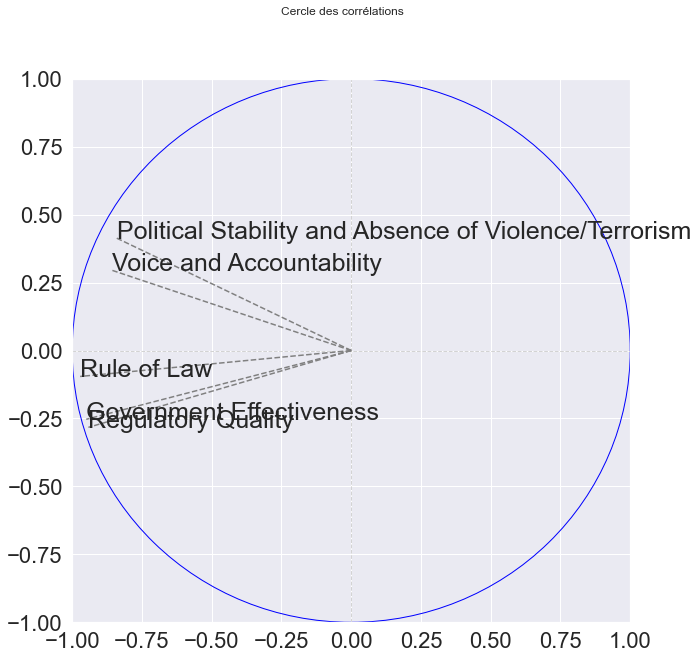

In [14]:
fig, axes = plt.subplots(figsize = (10, 10))
fig.suptitle("Cercle des corrélations")
axes.set_xlim(-1, 1)
axes.set_ylim(-1, 1)
axes.axvline(x = 0, color = 'lightgray', linestyle = '--', linewidth = 1)
axes.axhline(y = 0, color = 'lightgray', linestyle = '--', linewidth = 1)
for j in range(5):
    axes.text(coordvar_df["Dim1"][j],coordvar_df["Dim2"][j], coordvar_df.index[j], size = 25)
    axes.plot([0,coordvar_df["Dim1"][j]], [0,coordvar_df["Dim2"][j]], color = "gray", linestyle = 'dashed')
plt.gca().add_artist(plt.Circle((0,0),1,color='blue',fill=False))

plt.show()

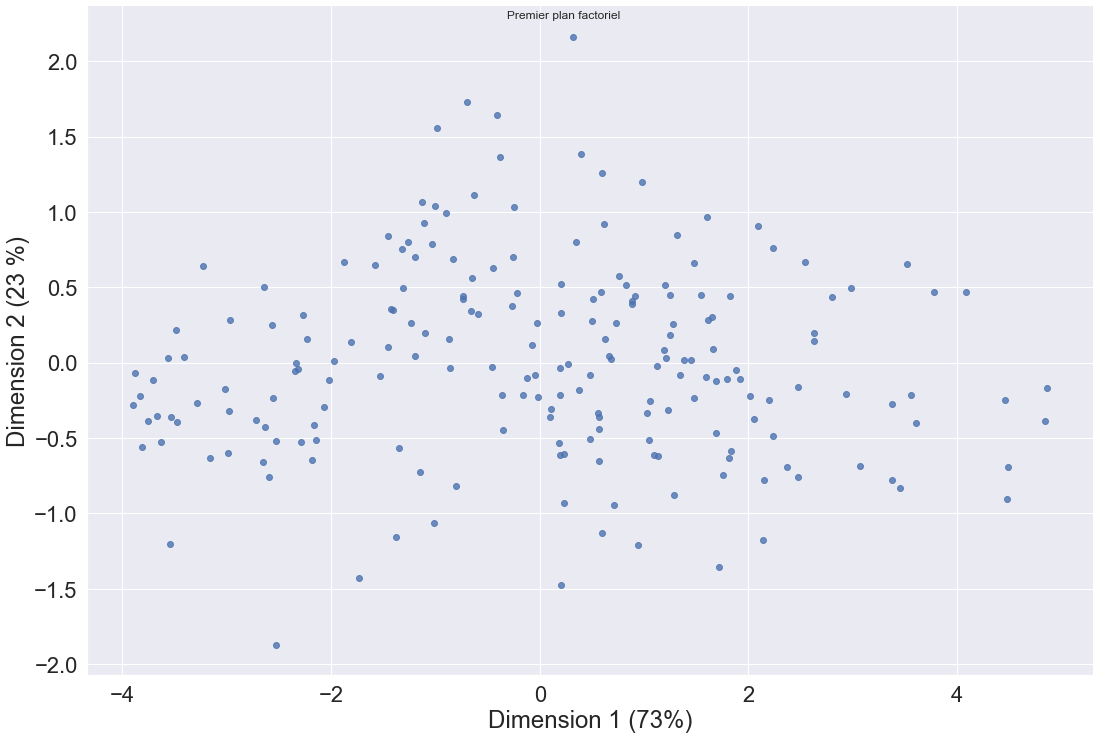

In [15]:
g_pca = seaborn.lmplot(x = "Dim1", y = "Dim2", data = wgi_proj, fit_reg = False, 
                       height = 10, aspect = 1.5)
g_pca.set(xlabel = "Dimension 1 (83%)", ylabel = "Dimension 2 (8%)")
g_pca.fig.suptitle("Premier plan factoriel")

plt.show()

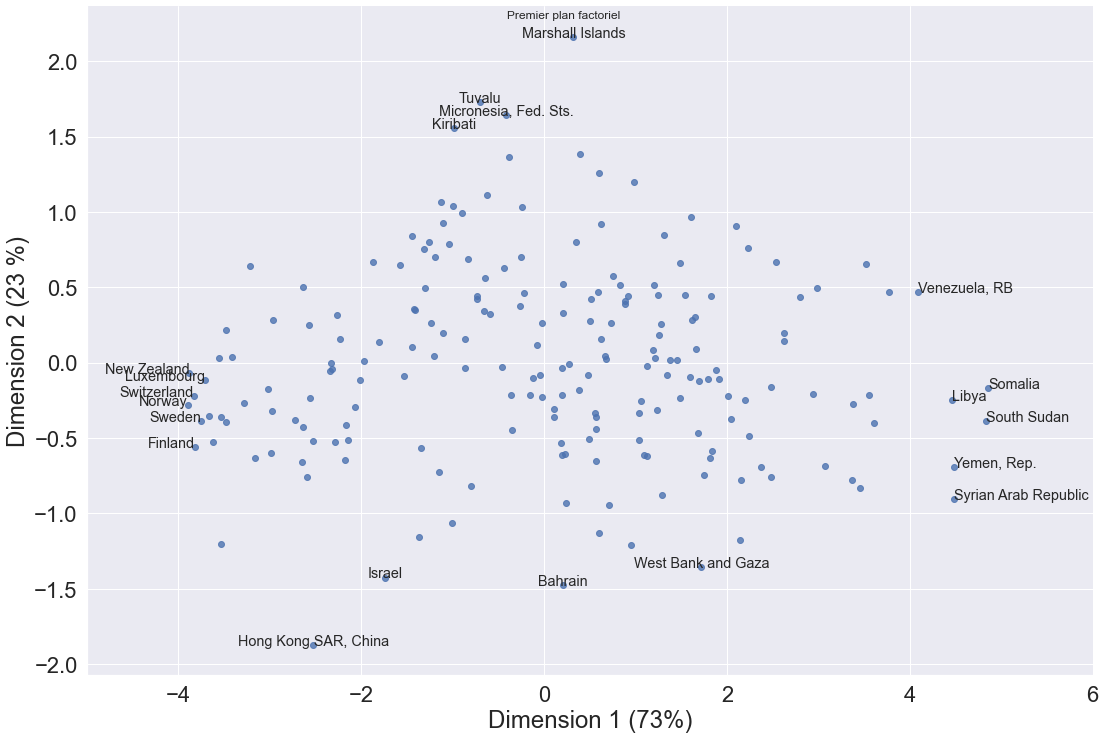

In [17]:
g_pca = seaborn.lmplot(x = "Dim1", y = "Dim2", data = wgi_proj, fit_reg = False, 
                       height = 10, aspect = 1.5)
g_pca.set(xlabel = "Dimension 1 (83%)", ylabel = "Dimension 2 (8 %)")
g_pca.fig.suptitle("Premier plan factoriel")
plt.xlim(-5, 6)

for i in range(wgi_proj.shape[0]):
    if (wgi_proj.loc[i][0] > 4):
        plt.text(wgi_proj.loc[i][0], wgi_proj.loc[i][1], wgi_proj.loc[i][5], ha = "left", fontsize = "x-large")
    if (wgi_proj.loc[i][0] < -3.7):
        plt.text(wgi_proj.loc[i][0], wgi_proj.loc[i][1], wgi_proj.loc[i][5], ha = "right", fontsize = "x-large")
    if (wgi_proj.loc[i][1] > 1.5):
        plt.text(wgi_proj.loc[i][0], wgi_proj.loc[i][1], wgi_proj.loc[i][5], ha = "center", fontsize = "x-large")
    if (wgi_proj.loc[i][1] < -1.3):
        plt.text(wgi_proj.loc[i][0], wgi_proj.loc[i][1], wgi_proj.loc[i][5], ha = "center", fontsize = "x-large")

plt.show()

In [18]:
wgi_proj.loc[1]

Dim1   -3.410131
Dim2    0.039344
Dim3    0.465981
Dim4   -0.131732
Dim5   -0.367349
Pays     Andorra
Name: 1, dtype: object